In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data=pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.columns=data.columns.str.strip()


In [10]:
data.rename(columns={'education-num':'education_new',
                   'marital-status':'marital_status',
                   'capital-gain':'gain',
                   'capital-loss':'loss',
                   'hours-per-week':'hours',
                   'native-country':'country'},inplace=True)

In [11]:
data.head()

,age,workclass,fnlwgt,education,education_new,marital_status,occupation,relationship,race,sex,gain,loss,hours,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df=data.drop(['fnlwgt','race','education','country'],axis=1)
df


,age,workclass,education_new,marital_status,occupation,relationship,sex,gain,loss,hours,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,<=50K


In [13]:
df['relationship']=df['relationship'].str.lower().str.strip()

In [14]:
df['marital_status']=df['marital_status'].str.lower().str.strip()

In [15]:
df['workclass']=df['workclass'].str.lower().str.strip()

In [16]:
df['occupation']=df['occupation'].str.lower().str.strip()

In [17]:
df['occupation'].unique()

array(['adm-clerical', 'exec-managerial', 'handlers-cleaners',
       'prof-specialty', 'other-service', 'sales', 'craft-repair',
       'transport-moving', 'farming-fishing', 'machine-op-inspct',
       'tech-support', '?', 'protective-serv', 'armed-forces',
       'priv-house-serv'], dtype=object)

In [18]:
df['occupation']=np.where(df['occupation']=='?','private',df['occupation'])

In [19]:
df['workclass']=np.where(df['workclass']=='?','unknown',df['workclass'])

In [20]:
df['workclass'].unique()

array(['state-gov', 'self-emp-not-inc', 'private', 'federal-gov',
       'local-gov', 'unknown', 'self-emp-inc', 'without-pay',
       'never-worked'], dtype=object)

In [21]:
df.dtypes

age                int64
workclass         object
education_new      int64
marital_status    object
occupation        object
relationship      object
sex               object
gain               int64
loss               int64
hours              int64
income            object
dtype: object

In [22]:
import seaborn as sns

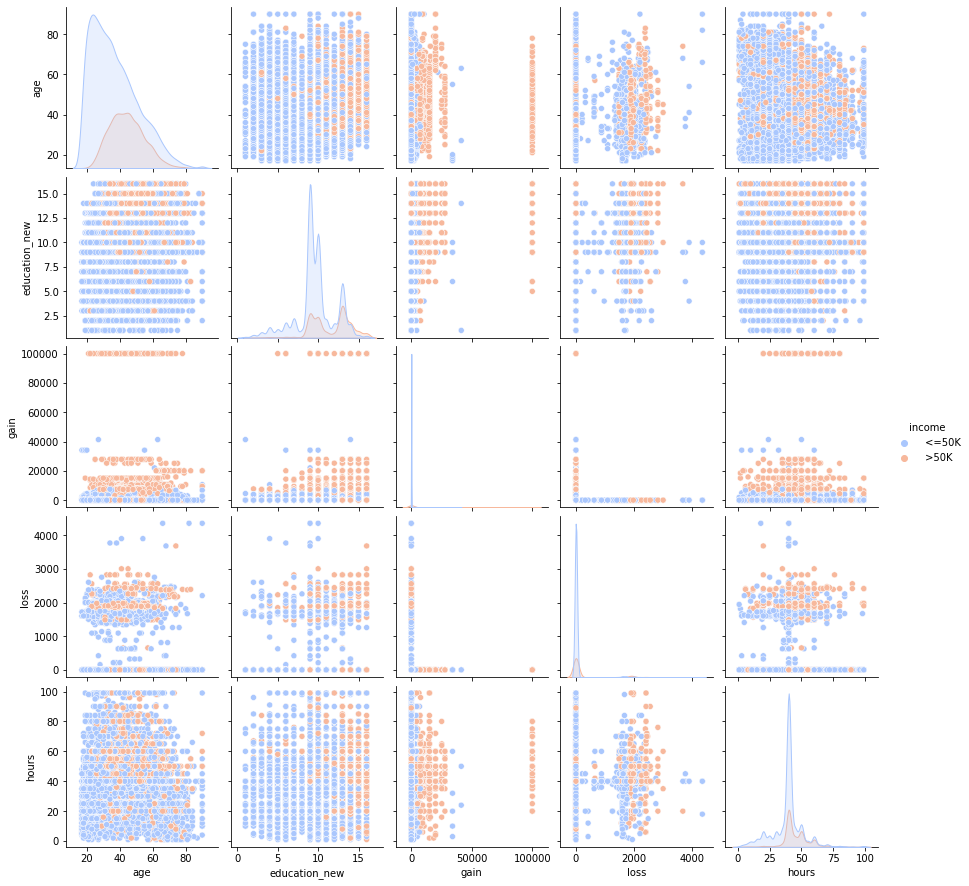

In [23]:
sns.pairplot(df,hue='income',palette='coolwarm')

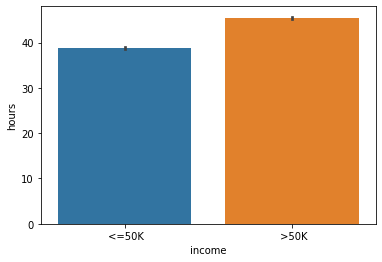

In [24]:
sns.barplot(x='income',y='hours',data=df)

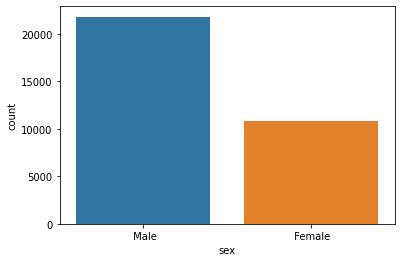

In [25]:
sns.countplot(x='sex',data=df)

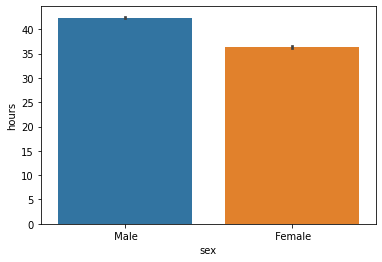

In [26]:
sns.barplot(x='sex',y='hours',data=df)

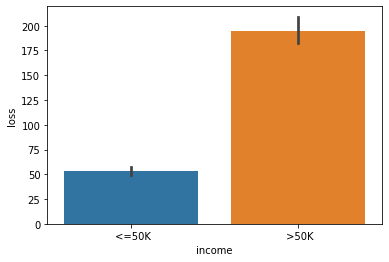

In [27]:
sns.barplot(x='income',y='loss',data=df)

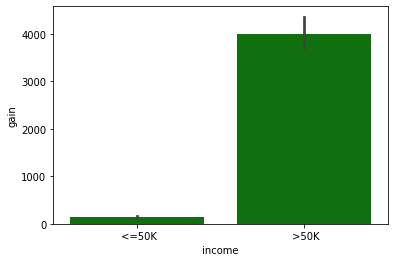

In [28]:
sns.barplot(x='income',y='gain',data=df,color="green")

In [29]:
(df==0).sum().sum()

60891

In [30]:
(df==1).sum().sum()

71

In [31]:
sex=pd.get_dummies(df['sex'],drop_first=True)
income=pd.get_dummies(df['income'],drop_first=True)
workclass=pd.get_dummies(df['workclass'],drop_first=True)
occupation=pd.get_dummies(df['occupation'],drop_first=True)
marital_status=pd.get_dummies(df['marital_status'],drop_first=True)
relationship=pd.get_dummies(df['relationship'],drop_first=True)
df.drop(['sex','income','marital_status','workclass','occupation','relationship'],axis=1,inplace=True)
df=pd.concat([df,sex,income,marital_status,workclass,occupation,relationship],axis=1)
df.head()


,age,education_new,gain,loss,hours,Male,>50K,married-af-spouse,married-civ-spouse,married-spouse-absent,never-married,separated,widowed,local-gov,never-worked,private,self-emp-inc,self-emp-not-inc,state-gov,unknown,without-pay,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,private,prof-specialty,protective-serv,sales,tech-support,transport-moving,not-in-family,other-relative,own-child,unmarried,wife
0,39,13,2174,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,13,0,0,13,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,9,0,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,0,0,40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [32]:
df.columns=df.columns.str.strip()

In [33]:
df.rename(columns={'>50K':'50k'},inplace=True)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('50k',axis=1),df['50k'],test_size=0.2,random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions=logmodel.predict(x_test)

In [39]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4972
           1       0.73      0.60      0.66      1541

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[4636  336]
 [ 613  928]]


In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
roc_auc_score(y_test,predictions)

0.7673139601234794

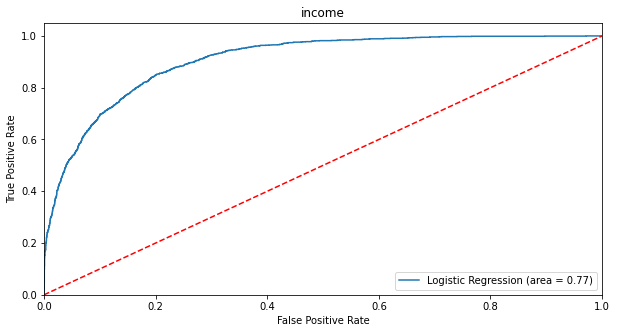

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('income')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
NBmodel=GaussianNB()
NBmodel.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
predicted=NBmodel.predict(x_test)
predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
cm2=confusion_matrix(y_test,predicted)
score2=accuracy_score(y_test,predicted)
cr2=classification_report(y_test,predicted)
auc2=roc_auc_score(y_test,predicted)

In [49]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Auc Score for Naive Bayes:',auc2 )

Confusion Matrix for Naive Bayes:
 [[4255  717]
 [ 396 1145]]
Accuracy Score for Naive Bayes: 0.8291110087517273
Auc Score for Naive Bayes: 0.7994082240168565


In [50]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.91      0.86      0.88      4972
           1       0.61      0.74      0.67      1541

    accuracy                           0.83      6513
   macro avg       0.76      0.80      0.78      6513
weighted avg       0.84      0.83      0.83      6513



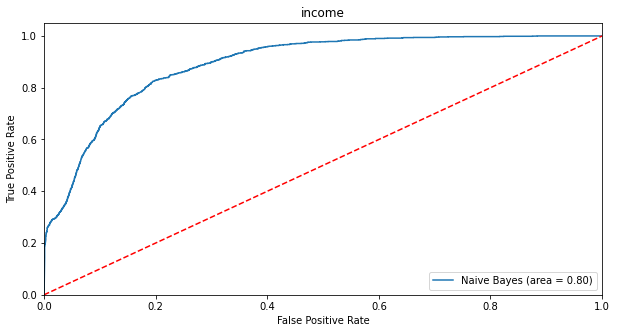

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('income')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='poly', probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [54]:
y_test

22357    0
26009    0
20734    0
17695    0
27908    1
        ..
17106    0
11372    0
30945    1
11173    0
22215    0
Name: 50k, Length: 6513, dtype: uint8

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7870413020113619


In [56]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9873417721518988
Recall: 0.10123296560674887


In [57]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4972
           1       0.99      0.10      0.18      1541

    accuracy                           0.79      6513
   macro avg       0.88      0.55      0.53      6513
weighted avg       0.83      0.79      0.71      6513



In [58]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [59]:
print('Confusion Matrix for SVM:''\n',cm3 )
print('Accuracy Score for SVM:',score3 )
print('Auc Score for svm:',auc3 )

Confusion Matrix for SVM:
 [[4970    2]
 [1385  156]]
Accuracy Score for SVM: 0.7870413020113619
Auc Score for svm: 0.5504153564960533


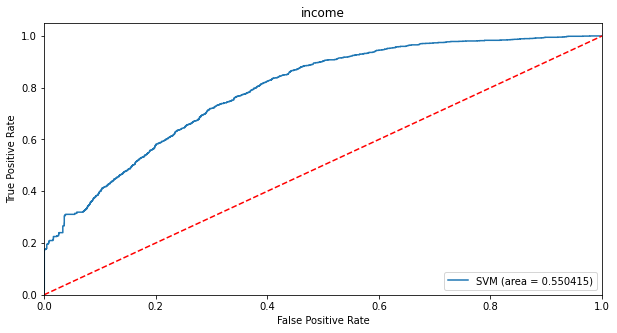

In [60]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('income')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [62]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))


Accuracy: 0.8274220789190849
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4972
           1       0.64      0.61      0.63      1541

    accuracy                           0.83      6513
   macro avg       0.76      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513



In [64]:
clf = DecisionTreeClassifier(criterion="entropy")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Accuracy: 0.8274220789190849
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4972
           1       0.64      0.61      0.63      1541

    accuracy                           0.83      6513
   macro avg       0.76      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513



In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(x_train,y_train);

In [66]:
y_pred = rf.predict(x_test)

In [67]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [68]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4972
           1       0.72      0.60      0.66      1541

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
y_pred = classifier.predict(x_test)

In [71]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [72]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[4520  452]
 [ 531 1010]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4972
           1       0.69      0.66      0.67      1541

    accuracy                           0.85      6513
   macro avg       0.79      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [73]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)

In [74]:
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8426368557453319
Standard deviation of CV: 0.006477515731366896
